<a href="https://colab.research.google.com/github/wanguiwaweru/Data-Analysis/blob/main/Animal_rescue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Animal Rescue in London

## Resources
- [Animal rescue incidents attended by LFB Dataset](https://data.london.gov.uk/dataset/animal-rescue-incidents-attended-by-lfb#:~:text=The%20London%20Fire%20Brigade%20attends,be%20trapped%20or%20in%20distress.)

## Install and Load Libraries

In [ ]:
install.packages("ggrepel")
install.packages("ggtext")
install.packages("here")
install.packages("patchwork")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("pdftools"):
“installation of package ‘pdftools’ had non-zero exit status”


In [ ]:
library(tidyverse)
library(ggtext)
library(here)
library(ggrepel)
library(patchwork)

## Explore Animal Rescue Dataset

In [ ]:
animals_df <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-06-29/animal_rescues.csv')

Rows: 7544 Columns: 31
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (26): date_time_of_call, fin_year, type_of_incident, pump_count, pump_ho...
dbl  (5): incident_number, cal_year, hourly_notional_cost, easting_rounded, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
colnames(animals_df)

[1] "incident_number"               "date_time_of_call"            
 [3] "cal_year"                      "fin_year"                     
 [5] "type_of_incident"              "pump_count"                   
 [7] "pump_hours_total"              "hourly_notional_cost"         
 [9] "incident_notional_cost"        "final_description"            
[11] "animal_group_parent"           "originof_call"                
[13] "property_type"                 "property_category"            
[15] "special_service_type_category" "special_service_type"         
[17] "ward_code"                     "ward"                         
[19] "borough_code"                  "borough"                      
[21] "stn_ground_name"               "uprn"                         
[23] "street"                        "usrn"                         
[25] "postcode_district"             "easting_m"                    
[27] "northing_m"                    "easting_rounded"              
[29] "northing_rounded"              "latitude"                     
[31] "longitude"

In [ ]:
ncol(animals_df)

[1] 31

The dataset has 7544 rows and 31 columns. The columns include;
- incident_number
- date_time_of_call
- cal_year
- fin_year
- type_of_incident
- pump_count
- pump_hours_total
- hourly_notional_cost
- incident_notional_cost
- final_description
- animal_group_parent
- originof_call
- property_type
- property_category
- special_service_type_category
- special_service_type
- ward_cod
- ward
- borough_code
- borough
- stn_ground_name
- uprn
- street
- usrn
- postcode_district
- easting_m
- northing_m
- easting_rounded
- northing_rounded
- latitude
- longitude


In [ ]:
dim(animals_df)

[1] 7544   31

Count the unique entries in each column

In [ ]:
sapply(animals_df, function(x) n_distinct(x))

incident_number             date_time_of_call 
                         4067                          7533 
                     cal_year                      fin_year 
                           13                            14 
             type_of_incident                    pump_count 
                            1                             5 
             pump_hours_total          hourly_notional_cost 
                           13                            11 
       incident_notional_cost             final_description 
                           72                          4556 
          animal_group_parent                 originof_call 
                           28                             8 
                property_type             property_category 
                          180                             7 
special_service_type_category          special_service_type 
                            4                            24 
                    ward_code                          ward 
                          711                          1255 
                 borough_code                       borough 
                           38                            71 
              stn_ground_name                          uprn 
                          107                          1453 
                       street                          usrn 
                         5804                          5070 
            postcode_district                     easting_m 
                          272                          3431 
                   northing_m               easting_rounded 
                         3381                           524 
             northing_rounded                      latitude 
                          420                          3633 
                    longitude 
                         3634

First 5 rows

In [ ]:
head(animals_df, 5)

incident_number,date_time_of_call,cal_year,fin_year,type_of_incident,pump_count,pump_hours_total,hourly_notional_cost,incident_notional_cost,final_description,⋯,uprn,street,usrn,postcode_district,easting_m,northing_m,easting_rounded,northing_rounded,latitude,longitude
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
139091,01/01/2009 03:01,2009,2008/09,Special Service,1,2,255,510,Redacted,⋯,NULL,Waddington Way,20500146,SE19,NULL,NULL,532350,170050,NULL,NULL
275091,01/01/2009 08:51,2009,2008/09,Special Service,1,1,255,255,Redacted,⋯,NULL,Grasmere Road,NULL,SE25,534785,167546,534750,167550,51.39095371,-0.064166887
2075091,04/01/2009 10:07,2009,2008/09,Special Service,1,1,255,255,Redacted,⋯,NULL,Mill Lane,NULL,SM5,528041,164923,528050,164950,51.36894086,-0.161985191
2872091,05/01/2009 12:27,2009,2008/09,Special Service,1,1,255,255,Redacted,⋯,1.00021E+11,Park Lane,21401484,UB9,504689,190685,504650,190650,51.60528344,-0.489683853
3553091,06/01/2009 15:23,2009,2008/09,Special Service,1,1,255,255,Redacted,⋯,NULL,Swindon Lane,21300122,RM3,NULL,NULL,554650,192350,NULL,NULL


Last 5 rows

In [ ]:
tail(animals_df, 5)

incident_number,date_time_of_call,cal_year,fin_year,type_of_incident,pump_count,pump_hours_total,hourly_notional_cost,incident_notional_cost,final_description,⋯,uprn,street,usrn,postcode_district,easting_m,northing_m,easting_rounded,northing_rounded,latitude,longitude
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
NA,31/05/2021 11:18,2021,2021/22,Special Service,1,1,352,352,INJURED CAT TRAPPED BETWEEN WALLS,⋯,NULL,COLEMAN ROAD,19900450,RM9,NULL,NULL,548450,184550,NULL,NULL
NA,31/05/2021 14:42,2021,2021/22,Special Service,1,1,352,352,Redacted,⋯,207046874,PRINCES AVENUE,20704626,N13,531553,192036,531550,192050,51.61180374,-0.101453845
NA,31/05/2021 15:47,2021,2021/22,Special Service,1,1,352,352,Redacted,⋯,NULL,ADDISON BRIDGE PLACE,21000028,W14,NULL,NULL,524550,178950,NULL,NULL
NA,31/05/2021 18:20,2021,2021/22,Special Service,1,1,352,352,BIRD TRAPPED IN FAN IN ATTIC,⋯,NULL,GREENFORD ROAD,20602353,UB6,NULL,NULL,514950,183550,NULL,NULL
NA,31/05/2021 19:00,2021,2021/22,Special Service,1,1,352,352,PIGEON WITH FOOT TRAPPED IN GUTTER ABOVE QUICK FIT- CALLER ON SCENE,⋯,NULL,BILLET ROAD,22816150,E17,NULL,NULL,537250,190950,NULL,NULL


In [ ]:
n_distinct(animals_df$animal_group_parent)

[1] 28

In [ ]:
unique(animals_df$animal_group_parent)

[1] "Dog"                                                    
 [2] "Fox"                                                    
 [3] "Horse"                                                  
 [4] "Rabbit"                                                 
 [5] "Unknown - Heavy Livestock Animal"                       
 [6] "Squirrel"                                               
 [7] "Cat"                                                    
 [8] "Bird"                                                   
 [9] "Unknown - Domestic Animal Or Pet"                       
[10] "Sheep"                                                  
[11] "Deer"                                                   
[12] "Unknown - Wild Animal"                                  
[13] "Snake"                                                  
[14] "Lizard"                                                 
[15] "Hedgehog"                                               
[16] "cat"                                                    
[17] "Hamster"                                                
[18] "Lamb"                                                   
[19] "Fish"                                                   
[20] "Bull"                                                   
[21] "Cow"                                                    
[22] "Ferret"                                                 
[23] "Budgie"                                                 
[24] "Unknown - Animal rescue from water - Farm animal"       
[25] "Pigeon"                                                 
[26] "Goat"                                                   
[27] "Tortoise"                                               
[28] "Unknown - Animal rescue from below ground - Farm animal"

The types of animals rescued can be categorized into Birds, Cats, Dogs, Domestic, foxes and wild animals.



In [ ]:
animals_categories_df <-
  animals_df %>%
  mutate(
    animal_group_aggregated = case_when(
      str_detect(animal_group_parent, "Domestic|Livestock|Farm|Horse|Cow|Sheep|Goat|Lamb|Bull|Rabbit") ~ "Other Domestic Animals",
      animal_group_parent %in% c("Cat", "cat") ~ "Cats",
      animal_group_parent %in% c("Bird", "Budgie") ~ "Birds",
      animal_group_parent == "Dog" ~ "Dogs",
      animal_group_parent == "Fox" ~ "Foxes",
      TRUE ~ "Other Wild Animals"
    )
  ) %>%
  count(cal_year, animal_group_aggregated) %>%
  group_by(animal_group_aggregated) %>%
  mutate(
    total = sum(n),
    current = n[which(cal_year == 2021)]
  ) %>%
  ungroup() %>%
  mutate(
    animal_group_aggregated = fct_reorder(animal_group_aggregated, total),
    animal_group_aggregated = fct_relevel(animal_group_aggregated, "Other Domestic Animals", after = 0),
    animal_group_aggregated = fct_relevel(animal_group_aggregated, "Other Wild Animals", after = 0)
  )

In [ ]:
animals_categories_df

cal_year,animal_group_aggregated,n,total,current
<dbl>,<fct>,<int>,<int>,<int>
2009,Birds,89,1532,83
2009,Cats,263,3666,151
2009,Dogs,132,1194,38
2009,Foxes,16,349,20
2009,Other Domestic Animals,50,545,16
2009,Other Wild Animals,18,258,11
2010,Birds,99,1532,83
2010,Cats,297,3666,151
2010,Dogs,122,1194,38


## Cats Rescued between 2009-2021

In [ ]:
cats_df <- animals_categories_df %>% filter(animal_group_aggregated == "Cats")
cats_df

cal_year,animal_group_aggregated,n,total,current
<dbl>,<fct>,<int>,<int>,<int>
2009,Cats,263,3666,151
2010,Cats,297,3666,151
2011,Cats,309,3666,151
2012,Cats,305,3666,151
2013,Cats,313,3666,151
2014,Cats,298,3666,151
2015,Cats,263,3666,151
2016,Cats,297,3666,151
2017,Cats,258,3666,151


In [ ]:
library(ggplot2)


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


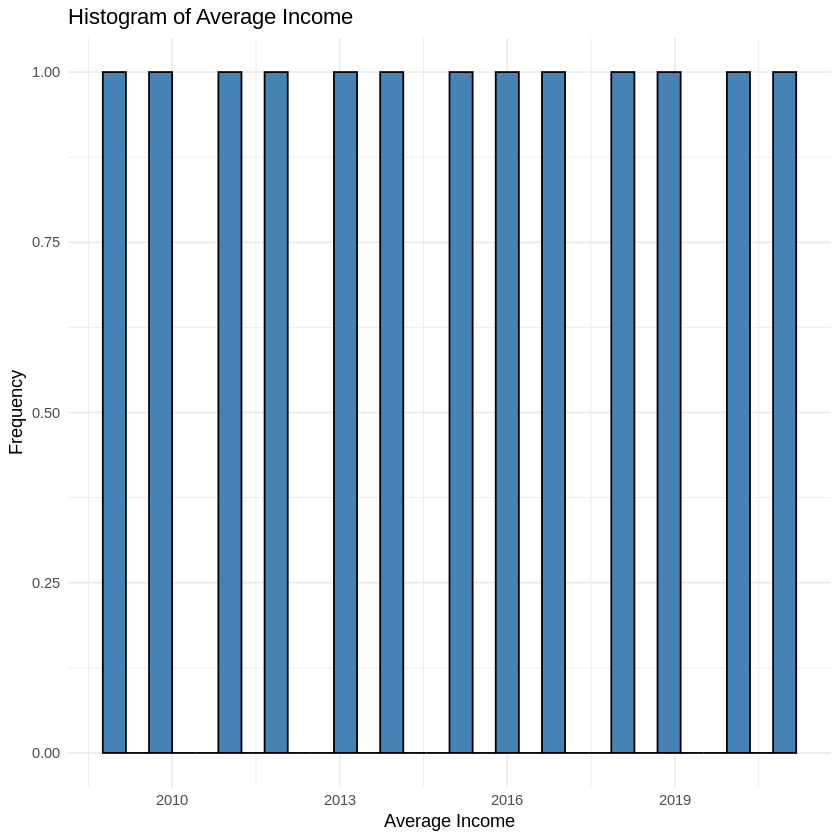

In [ ]:
ggplot(cats_df, aes(x = cal_year)) +
  geom_histogram(color = "black", fill = "steelblue") +
  labs(x = "Average Income", y = "Frequency") +
  ggtitle("Histogram of Average Income") +
  theme_minimal()

## Other

In [ ]:
df_animals_labs <-
  animals_categories_df %>%
  group_by(animal_group_aggregated)
df_animals_labs


cal_year,animal_group_aggregated,n,total,current
<dbl>,<fct>,<int>,<int>,<int>
2009,Birds,89,1532,83
2009,Cats,263,3666,151
2009,Dogs,132,1194,38
2009,Foxes,16,349,20
2009,Other Domestic Animals,50,545,16
2009,Other Wild Animals,18,258,11
2010,Birds,99,1532,83
2010,Cats,297,3666,151
2010,Dogs,122,1194,38


In [ ]:
df_animals_annotate <-
  animals_categories_df %>%
  mutate(label = "\n\n← Number of Rescues in 2021 so far.") %>%
  filter(cal_year == 2021 & animal_group_aggregated == "Cats")

df_animals_annotate

cal_year,animal_group_aggregated,n,total,current,label
<dbl>,<fct>,<int>,<int>,<int>,<chr>
2021,Cats,151,3666,151,← Number of Rescues in 2021 so far.


In [ ]:
df_animals_sum <-
  animals_categories_df %>%
  filter(cal_year < 2021) %>%
  group_by(cal_year) %>%
  summarize(n = sum(n))
df_animals_sum

cal_year,n
<dbl>,<int>
2009,568
2010,611
2011,620
2012,603
2013,585
2014,583
2015,540
2016,604
2017,539


In [ ]:
p1 <-
  df_animals_sum %>%
  ggplot(aes(cal_year, n)) +
    geom_col(aes(fill = factor(cal_year)), width = .85) +
    geom_col(
      data = animals_categories_df %>% filter(animal_group_aggregated == "Cats" & cal_year < 2021),
      aes(alpha = cal_year == 2020),
      fill = "white", width = .5
    ) +
    geom_text(
      data = df_animals_sum %>%
        mutate(n_lab = if_else(cal_year %in% c(2009, 2020), paste0(n, "\nRescues"), as.character(n))),
      aes(label = n_lab)) +
    geom_text(
      data = animals_categories_df %>% filter(animal_group_aggregated == "Cats" & cal_year < 2021) %>%
        mutate(n_lab = if_else(cal_year %in% c(2009, 2020), paste0(n, "\nCats"), as.character(n))),
      aes(label = n_lab)
    ) +
    geom_text(
      data = animals_categories_df%>% filter(animal_group_aggregated == "Cats" & cal_year < 2021),
      aes(y = -15, label = cal_year, color = factor(cal_year)), size = 6, hjust = .5, vjust = 1
    ) +
    coord_cartesian(clip = "off") +
    scale_y_continuous(limits = c(-15, NA)) +
    scale_color_manual(values = c(rep("grey30", 11), "#b40059", "grey70"), guide = "none") +
    scale_fill_manual(values = c(rep("grey30", 11), "#b40059", "grey70"), guide = "none") +
    scale_alpha_manual(values = c(.25, .4), guide = "none") +
    labs(title = "Animal Rescues by London Fire Brigade Rise 20% in a <b style='color:#b40059'>Pandemic Year</b>") +
    theme(
      plot.title = element_markdown(size = 28, margin = margin(5, 35, 25, 35), color = "black"),
      plot.subtitle = element_textbox_simple(margin = margin(5, 35, 15, 35)),
      panel.grid.major = element_blank(),
      axis.text.x = element_blank()
    )

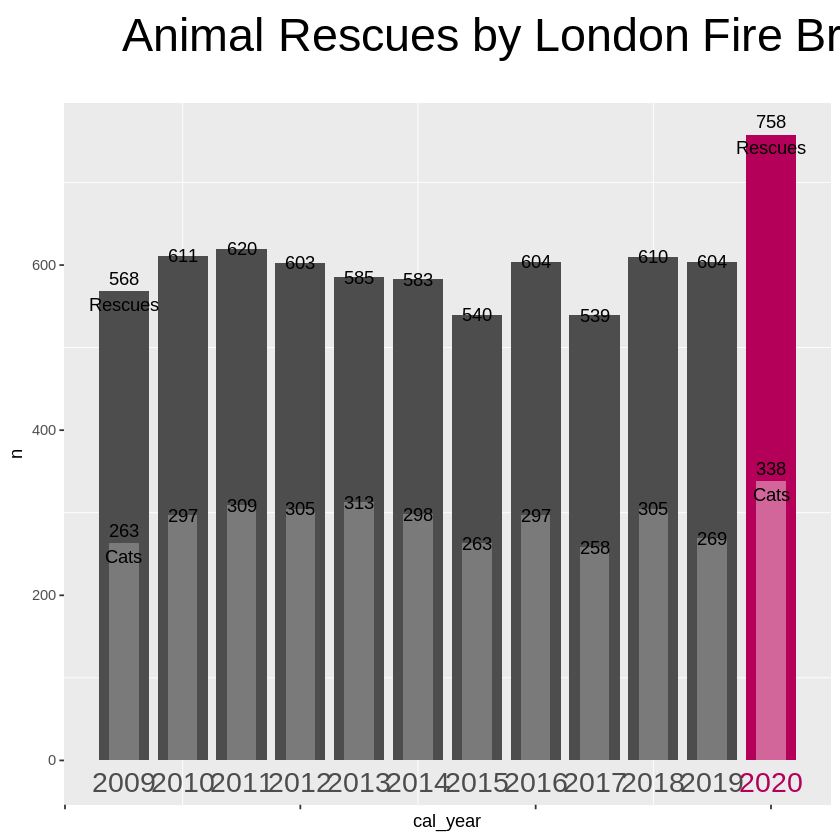

In [ ]:
p1

In [ ]:
p2 <-
  animals_categories_df %>%
  filter(cal_year < 2021) %>%
  ggplot(aes(animal_group_aggregated, n)) +
  geom_col(
    aes(y = current),
    fill = "grey85",
    position = position_dodge()
  ) +
  geom_col(
    aes(color = factor(cal_year), fill = after_scale(color)),
    position = position_dodge(), size = .001
  ) +
  geom_errorbar(
    data = filter(animals_categories_df, cal_year == 2021),
    aes(ymin = n, ymax = n),
    color = "grey70", size = .8
  ) +
  geom_text(
    data = animals_categories_df %>% filter(animal_group_aggregated == "Cats" & cal_year < 2021) %>%
      mutate(cal_year_lab = if_else(cal_year %in% c(2009, 2015, 2020), as.character(cal_year), "•")),
    aes(y = -8, label = cal_year_lab, color = factor(cal_year), size = cal_year_lab == "•"),
    position = position_dodge(width = .9)
  ) +
  ggrepel::geom_text_repel(
    data = df_animals_labs,
    aes(label = animal_group_aggregated),
    bg.color = "white", bg.r = .1 , segment.color = NA
  ) +
  geom_text(
    data = df_animals_annotate,
    aes(label = label)
  ) +
  coord_flip(clip = "off") +
  scale_x_discrete(expand = c(.09, .09)) +
  scale_y_continuous(breaks = c(0, 25, 50, 75, 100, 125, 150, 200, 250, 300, 350),
                     limits = c(-12, 355), sec.axis = dup_axis(name = "Number of Rescues")) +
  scale_color_manual(values = c(rep("grey30", 11), "#b40059", "grey70"), guide = "none") +
  scale_size_manual(values = c(3.8, 1.8), guide = "none") +
  labs(title = "Last Year, <b style='color:#b4005973'>Cats Accounted for 45%</b> of London Fire Brigade Animal Rescues, but the Biggest Proportional Increases were among Birds and Foxes.") +
  theme(plot.title = element_textbox_simple(size = 22, margin = margin(15, 35, 20, 35), color = "black"),
        plot.subtitle = element_textbox_simple(margin = margin(5, 35, 50, 35)))


Warning message:
“ggrepel: 65 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


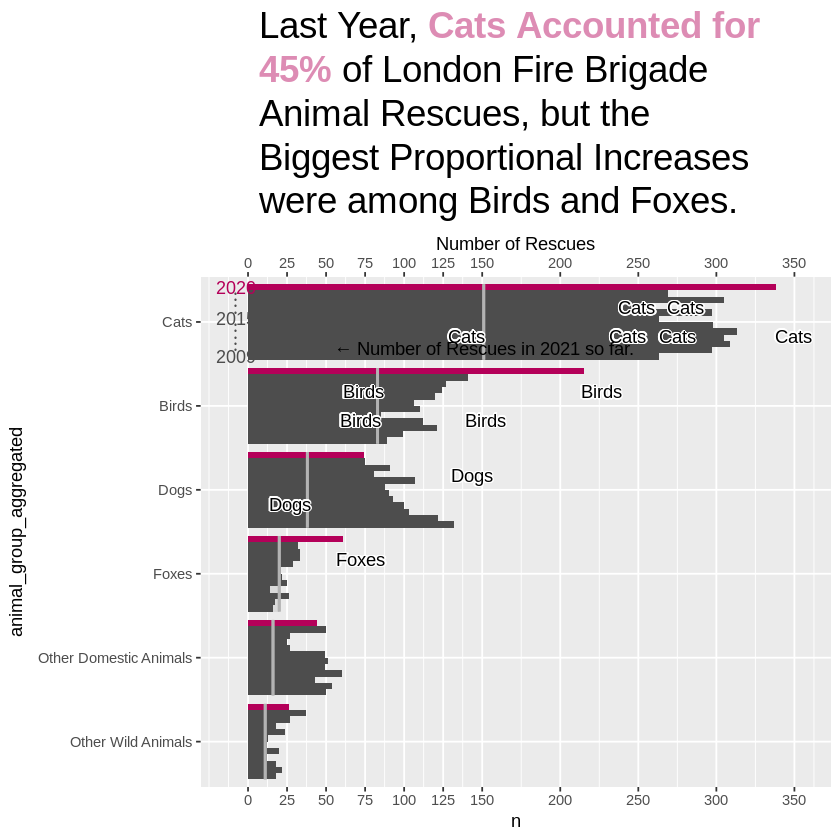

In [ ]:
p2

Warning message:
“ggrepel: 71 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


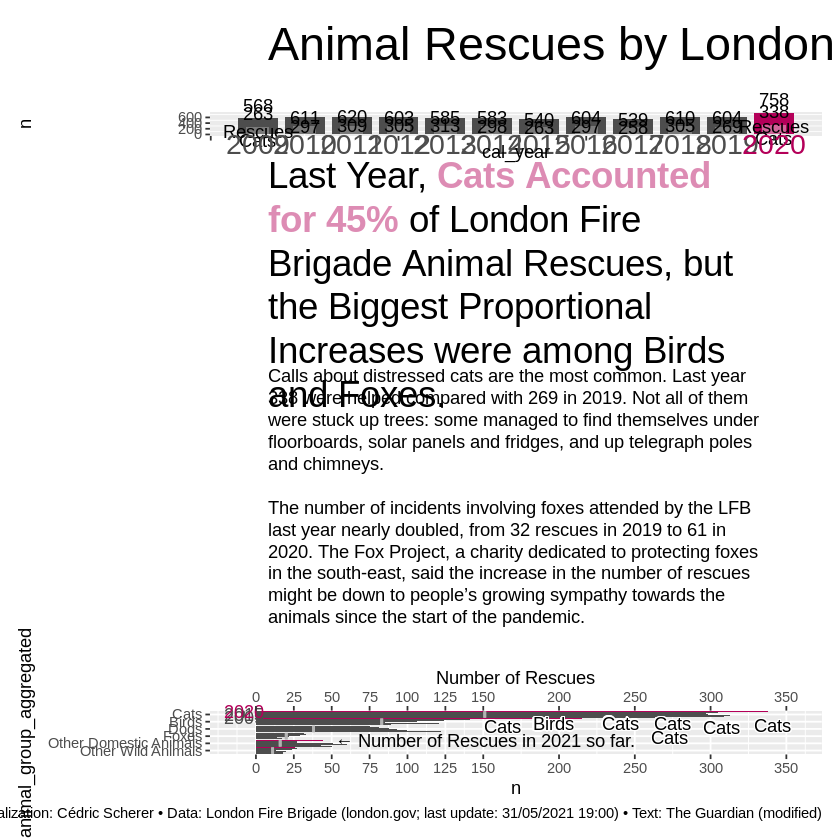

In [ ]:
p1 / p2 + plot_layout(heights = c(.55, 1))


## Plot location of calls on a map


In [ ]:
Plot location of calls on a map
